In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('./Datasets/sports_dataset.csv')
df.head()

,Player Name,Sport,Team,Age,Height (cm),Weight (kg),Games Played,Average Score per Game,Win Percentage
0,Thomas Rodriguez,Soccer,Man United,23,203,119,48,16.8,58.9
1,Charles Rodriguez,Soccer,Bayern,18,183,114,77,22.3,49.0
2,Joseph Davis,Basketball,Warriors,39,200,107,38,20.1,45.3
3,John Brown,Soccer,Real Madrid,31,203,64,65,27.9,76.0
4,James Rodriguez,Tennis,-,18,195,80,18,26.1,61.7


In [3]:
#We will examine slicing and subsetting of the dataset
#df.iloc[2:5, 1:4] - from 2nd to 4th row and from 1st to 3rd column

df.iloc[2:5,1:4]

,Sport,Team,Age
2,Basketball,Warriors,39
3,Soccer,Real Madrid,31
4,Tennis,-,18


In [4]:
df.head()

,Player Name,Sport,Team,Age,Height (cm),Weight (kg),Games Played,Average Score per Game,Win Percentage
0,Thomas Rodriguez,Soccer,Man United,23,203,119,48,16.8,58.9
1,Charles Rodriguez,Soccer,Bayern,18,183,114,77,22.3,49.0
2,Joseph Davis,Basketball,Warriors,39,200,107,38,20.1,45.3
3,John Brown,Soccer,Real Madrid,31,203,64,65,27.9,76.0
4,James Rodriguez,Tennis,-,18,195,80,18,26.1,61.7


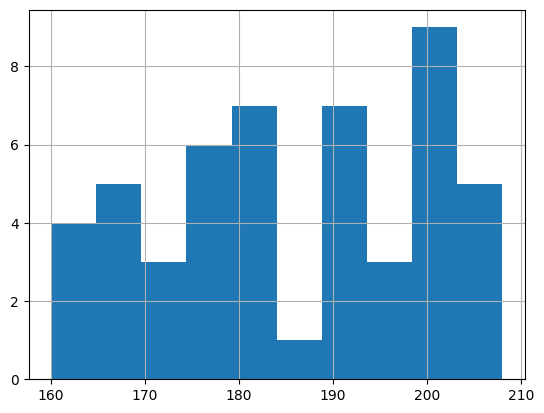

In [5]:
df["Height (cm)"].hist()
plt.show()

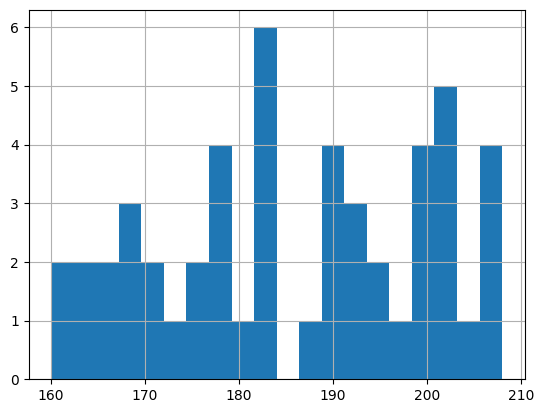

In [6]:
df["Height (cm)"].hist(bins=20)
plt.show()

In [7]:
avg_weight_by_sport = df.groupby("Sport")["Weight (kg)"].mean()
print(avg_weight_by_sport)

Sport
Baseball      80.500000
Basketball    95.000000
Football      96.363636
Soccer        92.200000
Tennis        83.888889
Name: Weight (kg), dtype: float64


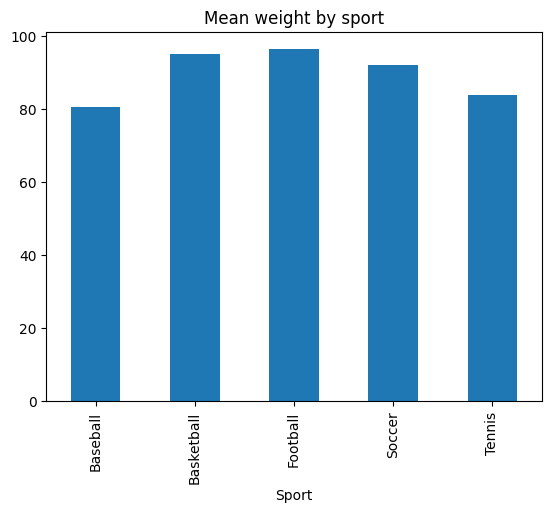

In [8]:
avg_weight_by_sport.plot(kind="bar", title="Mean weight by sport")
plt.show()

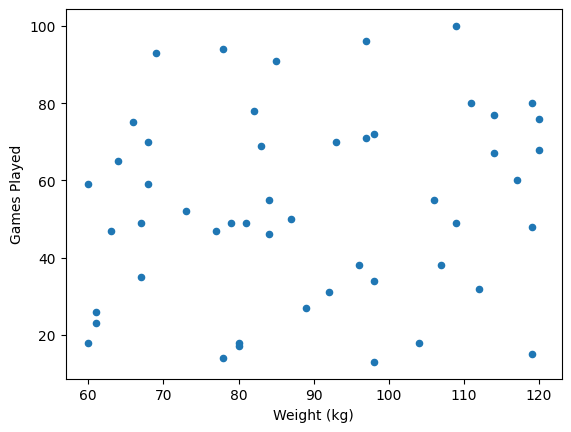

In [9]:
df.plot(x="Weight (kg)", y="Games Played", kind="scatter")
plt.show()

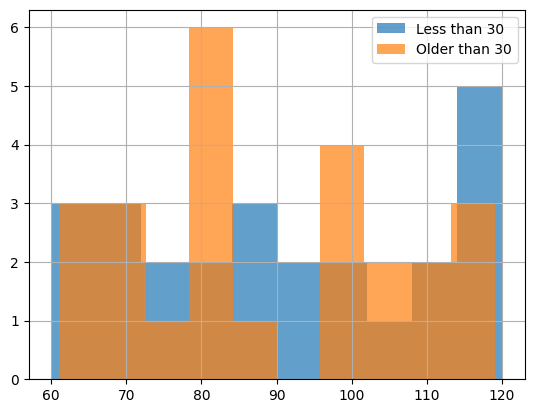

In [10]:
df[df["Age"] > 30]["Weight (kg)"].hist(alpha=0.7)
df[df["Age"] < 30]["Weight (kg)"].hist(alpha=0.7)
plt.legend(["Less than 30", "Older than 30"])
plt.show()

In [11]:
#detecting missing values
df.isna() #any(), sum(), dropna(), fillna(0)

,Player Name,Sport,Team,Age,Height (cm),Weight (kg),Games Played,Average Score per Game,Win Percentage
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [12]:
df.head()

,Player Name,Sport,Team,Age,Height (cm),Weight (kg),Games Played,Average Score per Game,Win Percentage
0,Thomas Rodriguez,Soccer,Man United,23,203,119,48,16.8,58.9
1,Charles Rodriguez,Soccer,Bayern,18,183,114,77,22.3,49.0
2,Joseph Davis,Basketball,Warriors,39,200,107,38,20.1,45.3
3,John Brown,Soccer,Real Madrid,31,203,64,65,27.9,76.0
4,James Rodriguez,Tennis,-,18,195,80,18,26.1,61.7


In [15]:
#Creating DataFrames using dictionaries
#1. List of dictonaries

list_of_dicts = [
    {"Name":"Thomas Rodriguez", "Sport":"Soccer", "Age":23, "Win Percentage": 58.9},
    {"Name":"Joseph Davis", "Sport":"Basketball", "Age":39, "Win Percentage": 45.3}
]
new_df = pd.DataFrame(list_of_dicts)

print(new_df)

               Name       Sport  Age  Win Percentage
0  Thomas Rodriguez      Soccer   23            58.9
1      Joseph Davis  Basketball   39            45.3


In [17]:
#2. Dictonary of lists - by column
dict_of_lists = {
    "Name":["John Brown", "James Rodriguez"],
    "Sport":["Soccer", "Tennis"],
    "Age":[31, 18],
    "Win Percentage":[76, 61.7]
}
new_df_2 = pd.DataFrame(dict_of_lists)
print(new_df_2)

              Name   Sport  Age  Win Percentage
0       John Brown  Soccer   31            76.0
1  James Rodriguez  Tennis   18            61.7
